In [4]:
# Importing relevant packages
import numpy as np
import os, sys
import pickle
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy import stats as stats

## path to the downloaded gutenberg corpus
path_gutenberg = os.path.join(os.pardir,os.pardir,'gutenberg')

## import internal helper functions
src_dir = os.path.join(os.pardir,'src')
sys.path.append(src_dir)

# Accessing the metadata
sys.path.append(os.path.join(path_gutenberg,'src'))
from metaquery import meta_query
mq = meta_query(path=os.path.join(path_gutenberg,'metadata','metadata.csv'), filter_exist=False)


In [5]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'axes.titlesize':12,
          'axes.labelsize': 12,
          'legend.fontsize': 8,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'xtick.direction':'out',
          'ytick.direction':'out',
          'axes.spines.right' : True,
          'axes.spines.top' : True
         }
plt.rcParams.update(params)

from matplotlib import rc
rc('text', usetex=True)

/var/folders/km/9ttg7bls33d_8n560hhmbnr00000gn/T/ipykernel_15882/882419756.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


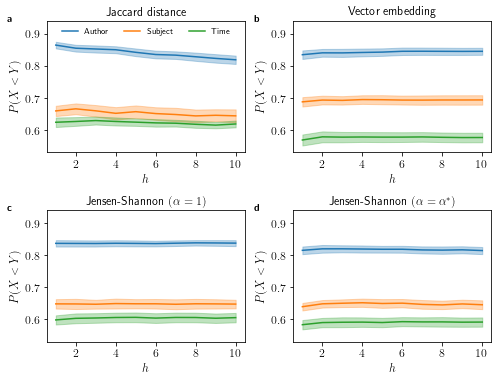

In [6]:
# Will include jaccard, embedding and two jsd
size = 'large'

fig, axes = plt.subplots(2,2, figsize=(7,5.4), tight_layout=True)

axes_map = {f'jaccard_{size}':(0,0),f'embedding_{size}':(0,1),
            f'jsd1_{size}':(1,0), f'jsdopt_{size}':(1,1)}

for measure_name in ['jaccard', 'embedding', 'jsd1', 'jsdopt']:
    key = f'{measure_name}_{size}'
    i,j = axes_map[key]
    ax = axes[i][j]
    ax.set_xlabel(r'$h$')
    ax.set_ylabel(r'$P(X<Y)$')
    ax.tick_params(labelleft=True)

    if size == 'small':
        ax.xaxis.set_ticks([4,8,12,16,20])
    elif size == 'large':
        ax.xaxis.set_ticks([2,4,6,8,10])

    if size == 'small':
        if measure_name == 'jaccard':
            ax.annotate(r'\textbf{a}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'Jaccard, $N = 500$')
            ax.set_ylim(bottom = 0.48, top=0.84)
        elif measure_name == 'embedding':
            ax.xaxis.set_ticks([4,8,12,16,20])
            ax.annotate(r'\textbf{b}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'Embedding, $N = 500$')
            ax.set_ylim(bottom = 0.47, top=0.89)
        elif measure_name == 'jsd1':
            ax.annotate(r'\textbf{c}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'JSD $(\alpha = 1)$, $N = 500$')
            ax.set_ylim(bottom = 0.49, top=0.85)
        elif measure_name == 'jsdopt':
            ax.annotate(r'\textbf{d}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'JSD $(\alpha = \alpha^*)$, $N = 500$')
            ax.set_ylim(bottom = 0.49, top=0.85)

            
    elif size == 'large':
        if measure_name == 'jaccard':
            ax.annotate(r'\textbf{a}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'Jaccard distance')
            ax.set_ylim(bottom = 0.53, top=0.94)
        elif measure_name == 'embedding':
            ax.xaxis.set_ticks([2,4,6,8,10])
            ax.annotate(r'\textbf{b}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'Vector embedding')
            ax.set_ylim(bottom = 0.53, top=0.94)
        elif measure_name == 'jsd1':
            ax.annotate(r'\textbf{c}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'Jensen-Shannon $(\alpha = 1)$')
            ax.set_ylim(bottom = 0.53, top=0.94)
        elif measure_name == 'jsdopt':
            ax.annotate(r'\textbf{d}',xy=(-0.2,1.0),xycoords = 'axes fraction',)
            ax.set_title(r'Jensen-Shannon $(\alpha = \alpha^*)$')
            ax.set_ylim(bottom = 0.53, top=0.94)

    colours = {'author':'C0', 'subject':'C1', 'time':'C2'}

    file_path = f'../output_files/{measure_name}_h_results_{size}.pickle'
    with open(file_path, 'rb') as f:
        measure_h = pickle.load(f)

    for task in ['author','subject','time']:
        results = measure_h[task]
        h_vals = []
        mean_vals = []
        error_vals = []
        for h in results:
            h_vals.append(h)
            val_list = results[h]
            mean_vals.append(np.mean(val_list))
            error_vals.append(np.std(val_list))
        
        ax.plot(h_vals, mean_vals, label = task.title(), color = colours[task])
        ax.fill_between(h_vals, np.array(mean_vals) - np.array(error_vals)/np.sqrt(10), 
                        np.array(mean_vals) + np.array(error_vals)/np.sqrt(10), 
                        color = colours[task], alpha=0.3)

        if measure_name == 'jaccard': 
            ax.legend(ncol=3, loc = 9, frameon=False)
        
fig.show()

# fig.savefig(f"../figures/h_test_{size}.pdf")